In [1]:
using CSV
using PyPlot
using Statistics

ENV["COLUMNS"] = 1000 # change number of columns dispalyed

1000

# CHE 599: Introduction to Data Science for Engineers

Fall 2019, MWF 10am-10:50am in Owen Hall 106

Instructor: Cory Simon [[simonensemble.github.io](https://simonensemble.github.io/)]


> "We are drowning in information but starved for knowledge." -John Naisbitt

> "The ability to take data — to be able to understand it, to process it, to extract value from it, to visualize it, to communicate it — that’s going to be a hugely important skill in the next decades." - Hal Varian, chief economist at Google and UC Berkeley professor of information sciences, business, and economics [source](https://datascience.berkeley.edu/about/what-is-data-science/)

<center><img src="glassdoor.png" alt="Glassdoor job ranking" width=800px></center>

<center><img src="hbr.png" alt="Glassdoor job ranking" width=800px></center>

... I'm an engineer, and I don't want to become a data scientist!

* Data science will play an increasingly important role in the chemical engineering discipline.

See ["Data Science for Chemical Engineers"](https://www.aiche.org/resources/publications/cep/2017/february/data-science-chemical-engineers) in AIChE's magazine.

<center><img src="uw_data_science_option.png" alt="Glassdoor job ranking" width=500px></center>

* In our research, most of us will collect data from which we aim to extract useful insights, infer, and predict.

# What is data science?

"Data Science is about drawing useful conclusions from large and diverse data sets through exploration, prediction, and inference." [source](https://www.inferentialthinking.com/chapters/01/what-is-data-science.html)

## exploration

identifying patterns in data, summarizing data, and communicating data (descritive statistics, data visualization)

In [66]:
df = CSV.read("wine.csv")
first(df, 5)

,wine_class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_to_OD315_of_diluted_wines,proline
,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
3,1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735


<center><img src="scatter_plot_matrix.png" alt="scatter plot matrix" width=600px></center>

we will learn to make publication-quality, effective, and communicative data visualizations using the free and open-source [matplotlib](https://matplotlib.org/).

## unsupervised learning
algorithms to find patterns in data or group data *without* labels

e.g. principal component analysis, clustering

<center><img src="pca_wines.png" alt="Glassdoor job ranking" width=600px></center>
latent space of wines (color = type of wine)

## inference

make conclusions about a population from a random sample; quantify uncertainty about these conclusions.

* What is the average salary in San Francisco? (learn bootstrap, confidence intervals, maximum likelihood)

In [2]:
df = CSV.read("sf_salaries.csv")[!, [:total_compensation]]

println("# samples: ", size(df, 1))

first(df, 5)

# samples: 500


,total_compensation
,Float64
1,2.15741e5
2,1.83135e5
3,1.80116e5
4,27262.1
5,17792.3


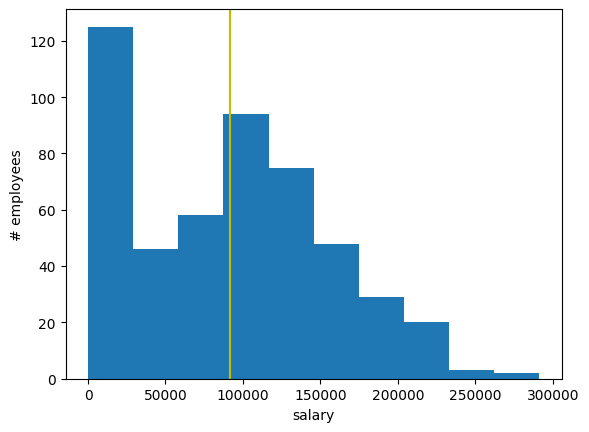

PyObject Text(24.000000000000007, 0.5, '# employees')

In [56]:
figure()
hist(df[!, :total_compensation])
axvline(mean(df[!, :total_compensation]), color="y")
xlabel("salary")
ylabel("# employees")

* Is maternal smoking associated with lower birth weight? (learn permutation tests, p-value)

In [86]:
df = CSV.read("baby.csv")[!, [:birth_weight, :maternal_smoker]]
println("# samples: ", size(df, 1))
first(df, 5) # "class" attribute = label (kidney disease = 1, no kidney disease = 0)

# samples: 1174


,birth_weight,maternal_smoker
,Int64,Bool
1,120,0
2,113,0
3,128,1
4,108,1
5,136,0


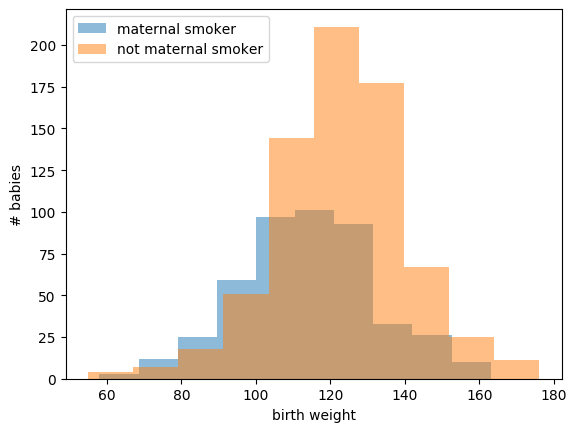

PyObject <matplotlib.legend.Legend object at 0x7fcbee6f22e8>

In [80]:
figure()
hist(df[df[!, :maternal_smoker], :birth_weight], alpha=0.5, label="maternal smoker")
hist(df[.! df[!, :maternal_smoker], :birth_weight], alpha=0.5, label="not maternal smoker")
xlabel("birth weight")
ylabel("# babies")
legend()

## prediction
use data to make predictions (supervised learning: regression, classification)

* Based on blood test, does this patient have kidney disease? [classification]

In [88]:
df = CSV.read("kidney_disease.csv")
first(df, 5)

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
,Int64,Int64,Float64,Int64,Int64,String,String,String,String,Int64,Int64,Float64,Int64,Float64,Float64,Int64,Int64,Float64,String,String,String,String,String,String,Int64
1,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
2,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
3,63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
4,68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
5,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


*observation*: data shows that e.g. blood glucose and white blood cell count are biomarkers for kidney disease

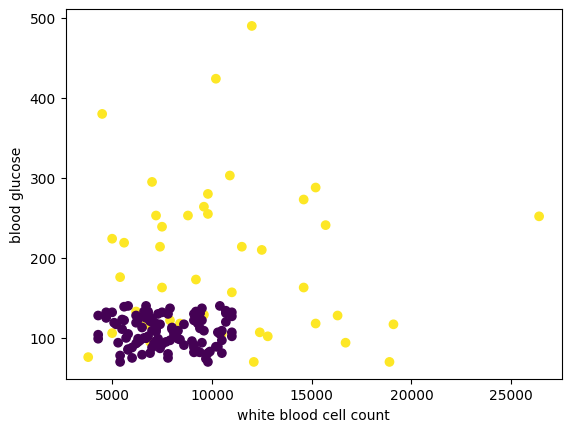

PyObject Text(24.000000000000007, 0.5, 'blood glucose')

In [90]:
figure()
scatter(df[!, Symbol("White Blood Cell Count")], df[!, Symbol("Blood Glucose")], c=df[!, Symbol("Class")])
xlabel("white blood cell count")
ylabel("blood glucose")

*idea*: train model on data we have, then use the model to predict the probability that a *new* patient has kidney disease on the basis of measurements of blood glucose, white blood cell count, etc.

* Given a nanoporous material and associated descriptors (density, pore size, void fraction), what is its adsorptive selectivity? [regression]

<center><img src="mof.png" alt="deep bind" width=200px></center>

In [92]:
df = CSV.read("materials_data.csv")
first(df, 10)

,crystal_density,pore_size,void_fraction,selectivity
,Float64,Float64,Float64,Float64
1,1659.26,6.90917,0.04596,7.16895
2,1783.07,4.96374,0.00746,6.43933
3,1071.12,10.0352,0.09914,9.44159
4,1875.9,4.96285,0.00996,7.53202
5,1002.19,7.02873,0.06094,11.6728
6,886.401,13.2699,0.23626,7.02738
7,1103.91,6.90622,0.05276,12.6155
8,1364.57,6.96292,0.12,3.09369
9,885.986,13.2751,0.23594,6.9777


*observation*: data shows that pore size and selectivity are correlated

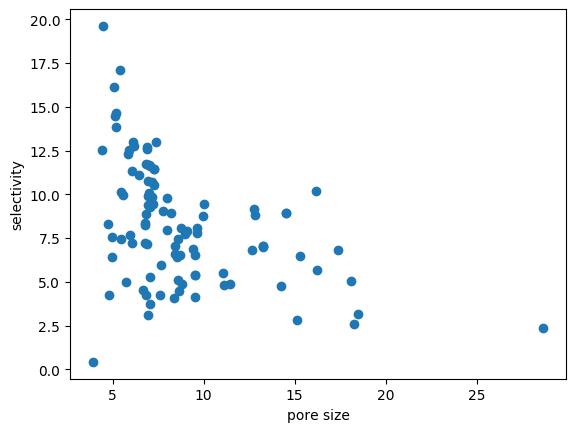

PyObject Text(24.000000000000007, 0.5, 'selectivity')

In [94]:
figure()
scatter(df[!, :pore_size], df[!, :selectivity])
xlabel("pore size")
ylabel("selectivity")

*idea*: train model on data we have, then use the model to predict the adsorptive selectivity of a new material (whose adsorption properties are unknown) on the basis of its crystal density, pore size, and void fraction.

# my journey into machine learning

* 1/2 PhD Mathematics at the University of British Columbia

<center><img src="https://www.ubc.ca/_assets/img/aerial_moa_panorama-1920x700.jpg" alt="UBC" width=400px></center>

* foundation in machine learning from course at UC Berkeley by [Jitendra Malik](https://en.wikipedia.org/wiki/Jitendra_Malik) and [Alexei Efros](https://en.wikipedia.org/wiki/Alexei_A._Efros) during my PhD

<center><img src="confusion_matrix.png" alt="confusion matrix" width=300px></center>



* data science intern at [Stitch Fix](https://algorithms-tour.stitchfix.com) during my PhD

<center><img src="customer_item_matrix.png" alt="confusion matrix" width=300px></center>

* postdoc in computational genomics at Altius Institute for Biomedical Sciences
    * e.g., convolutional neural networks can predict transcription factor binding to DNA sequences; see DeepBind [DOI: 10.1038/nbt.3300](https://www.nature.com/articles/nbt.3300/)
    
    <center><img src="deepbind.png" alt="deep bind" width=700px></center>

* current research focus: applying machine learning to materials discovery
    * using a random forest of [decision trees](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) to predict Xe/Kr selectivity of nanoporous materials [DOI: 10.1021/acs.chemmater.5b01475](https://pubs.acs.org/doi/abs/10.1021/acs.chemmater.5b01475)
    * apply facial recognition algorithm to group together porous molecules with similarly shaped cavities [DOI: 10.1021/acscentsci.8b00638](https://pubs.acs.org/doi/10.1021/acscentsci.8b00638)
    * NSF award for machine-learning latent representations of porous materials [here](https://www.nsf.gov/awardsearch/showAward?AWD_ID=1920945)

# unsupervised learning applied to materials discovery

> ❝Eigencages: Learning a latent space of porous cage molecules❞ A. Sturluson, M. T. Huynh, A. H. York, C. Simon. *ACS Central Science*. (2018)

### porous organic cage molecules

a set of 74 experimentally synthesized porous organic cage molecules. each harbors a nano-sized cavity that selectively adsorbs gas molecules.

<center><img src="https://pubs.acs.org/na101/home/literatum/publisher/achs/journals/content/acscii/2018/acscii.2018.4.issue-12/acscentsci.8b00638/20181218/images/large/oc-2018-00638n_0001.jpeg" width=500px></center>

the shape of the cavity is a primary determinant of the adsorptive selectivity.

goal: automatically group together cages that have similar cavity shapes via learning "latent vector representations" of the cages

### viewing materials as high-dimensional vectors

* take 3D computational scans of the porosity of each cage $\rightarrow$ a set of 3D images

* pixel $i$ takes on value $0$ or $1$ for void space or not (i.e. overlapping an atom).

* flatten the image, and we have a high-dimenionsional vector

    $g \times g \times g$ image $\implies$ cage $i$ is a vector $\mathbf{c}_i \in \mathbb{R}^{g^3}$

<center><img src="https://pubs.acs.org/na101/home/literatum/publisher/achs/journals/content/acscii/2018/acscii.2018.4.issue-12/acscentsci.8b00638/20181218/images/large/oc-2018-00638n_0002.jpeg" width=500px></center>




### a matrix that encapsulates all of the data

* stack the flattened cage images into a matrix $\mathbf{A}$ (with the average cage image $\bar{\mathbf{c}}$ subtracted)

\begin{equation}
    \mathbf{A} = \begin{bmatrix}
        \text{---} \hspace{-0.2cm} & \mathbf{c}_1^\intercal - \bar{\mathbf{c}}^\intercal & \hspace{-0.2cm} \text{---} \\
        & \vdots & \\
        \text{---} \hspace{-0.2cm} & \mathbf{c}_{74}^\intercal - \bar{\mathbf{c}}^\intercal  & \hspace{-0.2cm} \text{---} \\
    \end{bmatrix}
\end{equation}

* this matrix is full rank. i.e., we need 74 basis vectors (= cage images) to form all cage images

### a data compression problem

* The goal is to find a low-rank approximation of the matrix $\mathbf{A}$ (data compression).
* The idea is to express each cage as a combination of much fewer than 74 "basis" cage images.
* In the process of learning a low-rank approximation of $\mathbf{A}$, we learn the salient "ingredients" of cage images.

<center><img src="https://pubs.acs.org/na101/home/literatum/publisher/achs/journals/content/acscii/2018/acscii.2018.4.issue-12/acscentsci.8b00638/20181218/images/large/oc-2018-00638n_0003.jpeg" width=600px></center>

* the singular value decomposition (SVD) provides a convenient way to find the optimal low-rank approximation: zero out the smallest singular values $\sigma_i$.
* the columns of orthogonal matrix $\mathbf{V}$ are the orthogonal "ingredients" of cage images, ranked by importance.

### expressing a cage as a combination of ingredients

idea: each cage image is expressed as a linear combination of eigencages (ingredients) $\mathbf{v}_i$. If we impose that only two ingredients can be used:
\begin{equation}
\mathbf{c}_i = \bar{\mathbf{c}} + \alpha_{i} \mathbf{v}_1 + \beta_{i}  \mathbf{v}_2.
\end{equation}

* the $\mathbf{v}_1$ and $\mathbf{v}_2$ are the two most important ingredients learned from SVD
* the 2D latent vector representation of cage $i$ is $(\alpha_i, \beta_i)$

### the ingredients of cage images (eigencages)

<center><img src="https://pubs.acs.org/na101/home/literatum/publisher/achs/journals/content/acscii/2018/acscii.2018.4.issue-12/acscentsci.8b00638/20181218/images/large/oc-2018-00638n_0005.jpeg" width=300px></center>

### the latent representation of the cages

think of this as a visualization of the resulting 2D representations of the cages.

cages with similar cavity shapes congregate nearby in this "latent" cage space.

<center><img src="https://pubs.acs.org/na101/home/literatum/publisher/achs/journals/content/acscii/2018/acscii.2018.4.issue-12/acscentsci.8b00638/20181218/images/large/oc-2018-00638n_0007.jpeg" width=500px></center>

this was "learned" by the dimensionality reduction algorithm without any labels on the structures, e.g. "these cages are donut-shaped"